## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  77.796114   142.567478  0.502686   2.057411  0.715838
1  66.830382  1017.944848  0.413290   9.191218  1.517457
2  75.295707   882.588199  0.007031  10.160384  0.055184
3  92.981392  1234.079602  0.269232  10.595184  1.203294
4  97.920980   739.083315  0.647167   3.872410  1.449027


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0696806	total: 55.3ms	remaining: 55.2s
1:	learn: 1.0605109	total: 55.7ms	remaining: 27.8s
2:	learn: 1.0497217	total: 56.2ms	remaining: 18.7s
3:	learn: 1.0395238	total: 56.6ms	remaining: 14.1s
4:	learn: 1.0287739	total: 57.1ms	remaining: 11.4s
5:	learn: 1.0200906	total: 57.6ms	remaining: 9.54s
6:	learn: 1.0095626	total: 57.9ms	remaining: 8.22s
7:	learn: 0.9995907	total: 58.4ms	remaining: 7.24s
8:	learn: 0.9884980	total: 58.7ms	remaining: 6.47s
9:	learn: 0.9769571	total: 59.1ms	remaining: 5.85s
10:	learn: 0.9685521	total: 59.5ms	remaining: 5.35s
11:	learn: 0.9584886	total: 59.9ms	remaining: 4.93s
12:	learn: 0.9499468	total: 60.4ms	remaining: 4.59s
13:	learn: 0.9400493	total: 60.9ms	remaining: 4.29s
14:	learn: 0.9311900	total: 61.4ms	remaining: 4.03s
15:	learn: 0.9224006	total: 62ms	remaining: 3.81s
16:	learn: 0.9127857	total: 62.5ms	remaining: 3.61s
17:	learn: 0.9044490	total: 62.9ms	remaining: 3.43s
18:	learn: 0.8977060	total: 63.3ms	remaining: 

122:	learn: 0.3953309	total: 108ms	remaining: 772ms
123:	learn: 0.3924894	total: 109ms	remaining: 769ms
124:	learn: 0.3895274	total: 109ms	remaining: 765ms
125:	learn: 0.3869216	total: 110ms	remaining: 760ms
126:	learn: 0.3841130	total: 110ms	remaining: 756ms
127:	learn: 0.3810697	total: 110ms	remaining: 752ms
128:	learn: 0.3785856	total: 111ms	remaining: 748ms
129:	learn: 0.3759708	total: 111ms	remaining: 744ms
130:	learn: 0.3740038	total: 111ms	remaining: 740ms
131:	learn: 0.3715676	total: 112ms	remaining: 737ms
132:	learn: 0.3692335	total: 112ms	remaining: 732ms
133:	learn: 0.3667179	total: 113ms	remaining: 729ms
134:	learn: 0.3644028	total: 113ms	remaining: 725ms
135:	learn: 0.3617739	total: 114ms	remaining: 721ms
136:	learn: 0.3597785	total: 114ms	remaining: 718ms
137:	learn: 0.3576937	total: 114ms	remaining: 714ms
138:	learn: 0.3555412	total: 115ms	remaining: 711ms
139:	learn: 0.3533781	total: 115ms	remaining: 709ms
140:	learn: 0.3515075	total: 116ms	remaining: 705ms
141:	learn: 

298:	learn: 0.1700567	total: 186ms	remaining: 435ms
299:	learn: 0.1693999	total: 186ms	remaining: 434ms
300:	learn: 0.1687093	total: 186ms	remaining: 433ms
301:	learn: 0.1683929	total: 187ms	remaining: 432ms
302:	learn: 0.1677906	total: 187ms	remaining: 431ms
303:	learn: 0.1670390	total: 188ms	remaining: 430ms
304:	learn: 0.1664639	total: 188ms	remaining: 429ms
305:	learn: 0.1658704	total: 189ms	remaining: 428ms
306:	learn: 0.1655927	total: 189ms	remaining: 427ms
307:	learn: 0.1652029	total: 190ms	remaining: 426ms
308:	learn: 0.1645712	total: 190ms	remaining: 425ms
309:	learn: 0.1638556	total: 190ms	remaining: 424ms
310:	learn: 0.1635489	total: 191ms	remaining: 422ms
311:	learn: 0.1632003	total: 191ms	remaining: 421ms
312:	learn: 0.1625976	total: 192ms	remaining: 420ms
313:	learn: 0.1620701	total: 192ms	remaining: 420ms
314:	learn: 0.1615769	total: 192ms	remaining: 418ms
315:	learn: 0.1610352	total: 193ms	remaining: 418ms
316:	learn: 0.1604632	total: 193ms	remaining: 417ms
317:	learn: 

534:	learn: 0.0942591	total: 290ms	remaining: 252ms
535:	learn: 0.0938381	total: 291ms	remaining: 252ms
536:	learn: 0.0935421	total: 291ms	remaining: 251ms
537:	learn: 0.0933269	total: 292ms	remaining: 251ms
538:	learn: 0.0928966	total: 292ms	remaining: 250ms
539:	learn: 0.0925496	total: 293ms	remaining: 249ms
540:	learn: 0.0924747	total: 293ms	remaining: 249ms
541:	learn: 0.0924008	total: 293ms	remaining: 248ms
542:	learn: 0.0923277	total: 294ms	remaining: 247ms
543:	learn: 0.0921302	total: 294ms	remaining: 247ms
544:	learn: 0.0920171	total: 295ms	remaining: 246ms
545:	learn: 0.0917407	total: 295ms	remaining: 245ms
546:	learn: 0.0913399	total: 295ms	remaining: 245ms
547:	learn: 0.0910692	total: 296ms	remaining: 244ms
548:	learn: 0.0906772	total: 296ms	remaining: 244ms
549:	learn: 0.0904981	total: 297ms	remaining: 243ms
550:	learn: 0.0901008	total: 297ms	remaining: 242ms
551:	learn: 0.0899251	total: 298ms	remaining: 242ms
552:	learn: 0.0895547	total: 298ms	remaining: 241ms
553:	learn: 

710:	learn: 0.0604453	total: 368ms	remaining: 149ms
711:	learn: 0.0602111	total: 368ms	remaining: 149ms
712:	learn: 0.0600295	total: 369ms	remaining: 148ms
713:	learn: 0.0598510	total: 369ms	remaining: 148ms
714:	learn: 0.0596853	total: 370ms	remaining: 147ms
715:	learn: 0.0595684	total: 370ms	remaining: 147ms
716:	learn: 0.0594661	total: 370ms	remaining: 146ms
717:	learn: 0.0593587	total: 371ms	remaining: 146ms
718:	learn: 0.0591368	total: 371ms	remaining: 145ms
719:	learn: 0.0589666	total: 372ms	remaining: 145ms
720:	learn: 0.0587626	total: 372ms	remaining: 144ms
721:	learn: 0.0585630	total: 373ms	remaining: 143ms
722:	learn: 0.0583676	total: 373ms	remaining: 143ms
723:	learn: 0.0581764	total: 373ms	remaining: 142ms
724:	learn: 0.0580777	total: 374ms	remaining: 142ms
725:	learn: 0.0579598	total: 374ms	remaining: 141ms
726:	learn: 0.0578047	total: 374ms	remaining: 141ms
727:	learn: 0.0577079	total: 375ms	remaining: 140ms
728:	learn: 0.0575757	total: 375ms	remaining: 140ms
729:	learn: 

960:	learn: 0.0362120	total: 471ms	remaining: 19.1ms
961:	learn: 0.0361275	total: 472ms	remaining: 18.6ms
962:	learn: 0.0360301	total: 472ms	remaining: 18.1ms
963:	learn: 0.0359209	total: 473ms	remaining: 17.7ms
964:	learn: 0.0358505	total: 473ms	remaining: 17.2ms
965:	learn: 0.0358032	total: 474ms	remaining: 16.7ms
966:	learn: 0.0357063	total: 474ms	remaining: 16.2ms
967:	learn: 0.0356232	total: 475ms	remaining: 15.7ms
968:	learn: 0.0355446	total: 475ms	remaining: 15.2ms
969:	learn: 0.0354929	total: 476ms	remaining: 14.7ms
970:	learn: 0.0354151	total: 476ms	remaining: 14.2ms
971:	learn: 0.0353642	total: 477ms	remaining: 13.7ms
972:	learn: 0.0352600	total: 477ms	remaining: 13.2ms
973:	learn: 0.0351527	total: 477ms	remaining: 12.7ms
974:	learn: 0.0350977	total: 478ms	remaining: 12.3ms
975:	learn: 0.0350100	total: 478ms	remaining: 11.8ms
976:	learn: 0.0349335	total: 479ms	remaining: 11.3ms
977:	learn: 0.0348838	total: 479ms	remaining: 10.8ms
978:	learn: 0.0347981	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

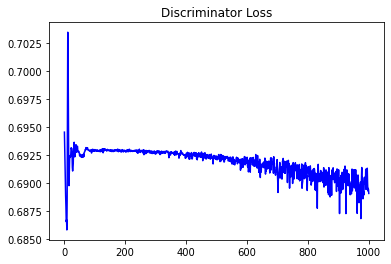

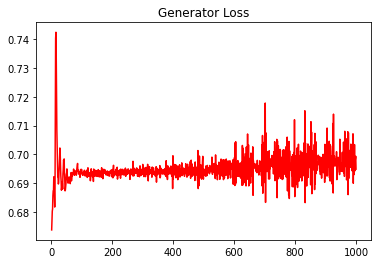

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12359066927329895


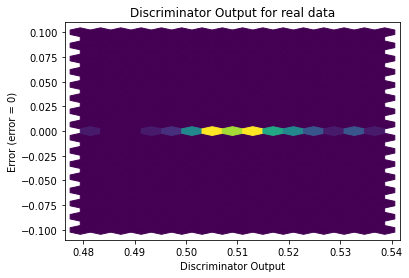

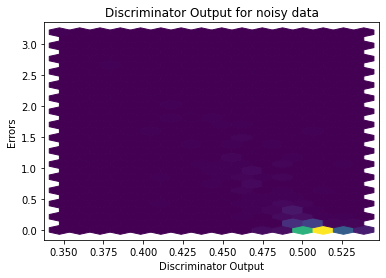

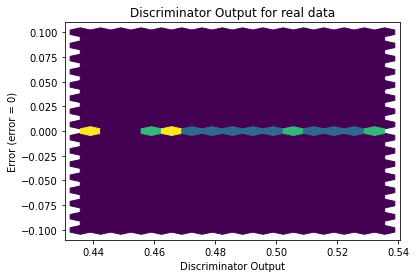

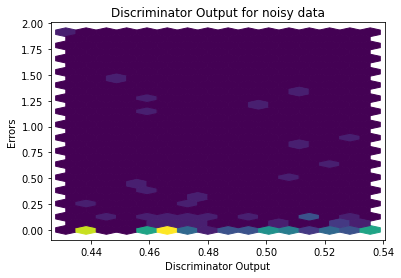

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


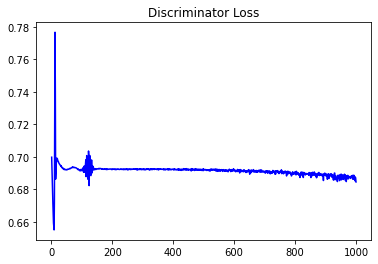

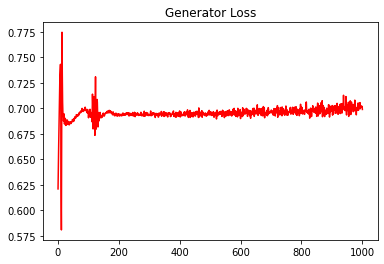

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14404717833423897


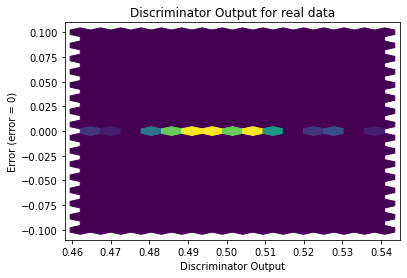

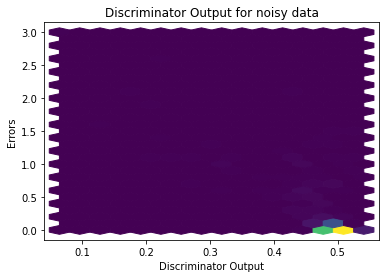

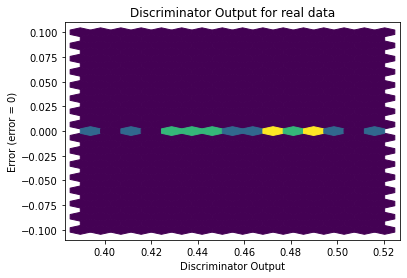

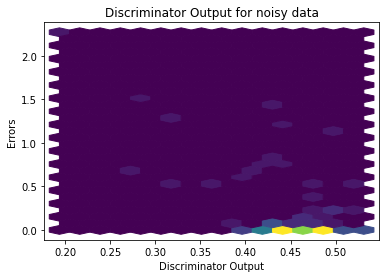

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0791]], requires_grad=True)
